## Rahul Kumar Raman
## Date: 09/09/20

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data



In [4]:
link='http://bit.ly/w-data'
df=pd.read_csv(link)

### Have an overview on our dataset

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [7]:
print(df.dtypes)


Hours     float64
Scores      int64
dtype: object


### Exploring our dataset

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


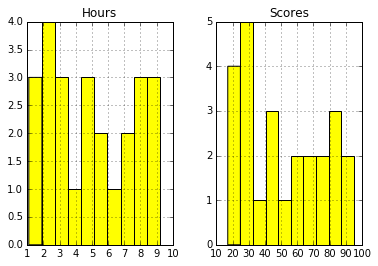

In [9]:
viz=df[['Hours','Scores']]
viz.hist(color='yellow')
plt.show()


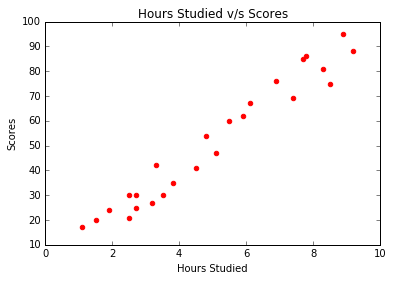

In [10]:
plt.scatter(df.Hours,df.Scores,color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

Conclusion of our overview and exploration of our dataset, we have concluded that 'Hours Studied' and 'Scores' are linearly on each other.

### Training and Testing

In [11]:
pdata=np.random.rand(len(df)) < 0.8
train=df[pdata]
test=df[~pdata]

### A look at our training data set

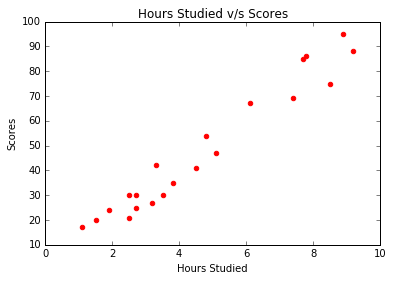

In [12]:
plt.scatter(train.Hours,train.Scores,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

### Modeling our training data set

In [13]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Hours']])
train_y=np.asanyarray(train[['Scores']])
reg.fit(train_x,train_y)
print('Coefficients: ',reg.coef_)
print('Intercept: ',reg.intercept_)

('Coefficients: ', array([[ 9.70865909]]))
('Intercept: ', array([ 2.36930226]))


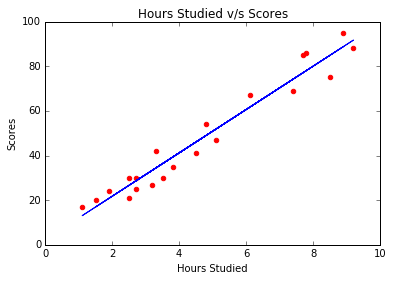

In [15]:
plt.scatter(train.Hours,train.Scores,color='red')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'-b')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours Studied v/s Scores')
plt.show()

### Predicting 

In [17]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['Hours']])
test_y=np.asanyarray(test[['Scores']])
test_y_pd=reg.predict(test_x)
own_pred=reg.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = [ 92.17439888]


In [18]:
print(test_y)

[[60]
 [81]
 [62]
 [76]]


In [19]:
print(test_y_pd)

[[ 55.76692728]
 [ 82.95117274]
 [ 59.65039091]
 [ 69.35905001]]


### Evaluating how our model performed

In [20]:
print('Mean absoulete error: %.2f' % np.mean(np.absolute(test_y_pd-test_y)))
print('Residual sum of squares(MSE): %.2f' % np.mean((test_y_pd-test_y)**2))
print('R2 score: %.2f' % r2_score(test_y_pd,test_y))

Mean absoulete error: 3.79
Residual sum of squares(MSE): 17.84
R2 score: 0.84
